### RAG - Retrieval Augmented Generation
- 개인으로부터 제공된 데이터를 사용하거나 탐색함으로써 모델의 성능을 향상시키는 방법
- 질문 -> 제공 데이터 Vector 탐색 -> 모델에게 전달 -> 결과

In [36]:
# Retieval
# langchain의 모듈
# Source -> Load -> Transform -> Embed -> Store -> Retieval
from langchain_community.document_loaders import UnstructuredFileLoader
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

# UnstructuredFileLoader 작동하지 않음
loader = UnstructuredFileLoader("./files/scale.txt")
loader.load()

[Document(metadata={'source': './files/scale.txt'}, page_content='확장가능하지 않는 일을 해고하더라도\n\nY Combinator에서 제공하는 가장 일반적인 유형의 조언 중 하나는 확장되지 않는 작업을 수행하라는 것입니다. 많은 예비 창업자들은 스타트업이 성공할 수도 있고 그렇지 않을 수도 있다고 믿습니다. 무언가를 만들어서 사용할 수 있게 만들고, 더 나은 쥐덫을 만들었다면 사람들은 약속한 대로 길을 따라 여러분의 집 문으로 다가갈 것입니다. 그렇지 않으면 시장이 존재하지 않아야 합니다. [\xa0[1](https://www.paulgraham.com/ds.html#f1n)\xa0]\n\n실제로 스타트업이 성공하는 이유는 창업자가 성공하도록 만들기 때문입니다. 스스로 성장한 소수가 있을 수 있지만 일반적으로 성장하려면 일종의 추진력이 필요합니다. 좋은 비유는 자동차 엔진이 전기 시동 장치를 갖기 전에 가졌던 크랭크입니다. 일단 엔진이 작동하면 계속 작동하지만 이를 작동시키기 위해서는 별도의 힘든 프로세스가 필요했습니다.\n\n모집**\n\n창업자가 처음에 해야 하는 가장 일반적이고 확장 불가능한 일은 사용자를 수동으로 모집하는 것입니다. 거의 모든 스타트업이 그래야 합니다. 사용자가 당신에게 오기를 기다릴 수 없습니다. 나가서 가져와야합니다.\n\nStripe는 우리가 자금을 지원한 가장 성공적인 스타트업 중 하나이며 그들이 해결한 문제는 시급한 문제였습니다. 누구든지 앉아서 사용자를 기다릴 수 있었다면 바로 Stripe이었습니다. 하지만 실제로 YC 내에서는 공격적인 초기 사용자 확보로 유명합니다.\n\n다른 스타트업을 위한 제품을 만드는 스타트업은 우리가 자금을 지원한 다른 회사에 잠재 사용자가 많으며 Stripe보다 이를 더 잘 활용한 회사는 없습니다. YC에서는 그들이 발명한 기술에 대해 "콜리슨 설치"라는 용어를 사용합니다. 좀 더 확신이 없는 창업자들은 "저희 베타 버전을 사용해 보시겠어요? "라

In [11]:
# Transform
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader

splitter = RecursiveCharacterTextSplitter(
  chunk_size=200, # 한 문장의 사이즈 설정
  chunk_overlap=50 # 문장구조를 해치지 않고 가져오기 위한 사이즈설정
)
loader = TextLoader("./files/scale.txt")

# 첫번째 방법
# docs = text_loader.load()
# splitter.split_documents(docs)

# 두번째 방법
TextLoader.load_and_split(text_splitter=splitter)

TypeError: BaseLoader.load_and_split() missing 1 required positional argument: 'self'

In [22]:
# Transform
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader

splitter = CharacterTextSplitter(
  separator="\n",
  chunk_size=600,
  chunk_overlap=100,
  length_function=len,
)
loader = TextLoader("./files/scale.txt")

# 첫번째 방법
# docs = text_loader.load()
# splitter.split_documents(docs)

# 두번째 방법
text_loader.load_and_split(text_splitter=splitter)

Created a chunk of size 1312, which is longer than the specified 600


[Document(metadata={'source': './files/scale.txt'}, page_content='확장가능하지 않는 일을 해고하더라도\nY Combinator에서 제공하는 가장 일반적인 유형의 조언 중 하나는 확장되지 않는 작업을 수행하라는 것입니다. 많은 예비 창업자들은 스타트업이 성공할 수도 있고 그렇지 않을 수도 있다고 믿습니다. 무언가를 만들어서 사용할 수 있게 만들고, 더 나은 쥐덫을 만들었다면 사람들은 약속한 대로 길을 따라 여러분의 집 문으로 다가갈 것입니다. 그렇지 않으면 시장이 존재하지 않아야 합니다.\xa0[\xa0[1](https://www.paulgraham.com/ds.html#f1n)\xa0]  \n  \n실제로 스타트업이 성공하는 이유는 창업자가 성공하도록 만들기 때문입니다. 스스로 성장한 소수가 있을 수 있지만 일반적으로 성장하려면 일종의 추진력이 필요합니다. 좋은 비유는 자동차 엔진이 전기 시동 장치를 갖기 전에 가졌던 크랭크입니다. 일단 엔진이 작동하면 계속 작동하지만 이를 작동시키기 위해서는 별도의 힘든 프로세스가 필요했습니다.  \n  \n**모집**'),
 Document(metadata={'source': './files/scale.txt'}, page_content='**모집**  \n  \n창업자가 처음에 해야 하는 가장 일반적이고 확장 불가능한 일은 사용자를 수동으로 모집하는 것입니다. 거의 모든 스타트업이 그래야 합니다. 사용자가 당신에게 오기를 기다릴 수 없습니다. 나가서 가져와야합니다.  \n  \nStripe는 우리가 자금을 지원한 가장 성공적인 스타트업 중 하나이며 그들이 해결한 문제는 시급한 문제였습니다. 누구든지 앉아서 사용자를 기다릴 수 있었다면 바로 Stripe이었습니다. 하지만 실제로 YC 내에서는 공격적인 초기 사용자 확보로 유명합니다.  \n  \n다른 스타트업을 위한 제품을 만드는 스타트업은 우리가 자금을 지원한 다른 회사에 잠재 사용자가 많으며 Stripe보다 이를 더 잘

In [23]:
# Embed : 사람이 읽는 텍스트를 컴퓨터가 이해할 수 있는 수자들로 변환하는 작업
# Vectorization (벡터화)



### Embed : 사람이 읽는 텍스트를 컴퓨터가 이해할 수 있는 수자들로 변환하는 작업
### Vectorization (벡터화) * 추천시스템에서 많이 사용함(백터 공간에서 가까운 것들을 추출해주겠지.)

|      |  Masculinity | Femininity | Royality   |
|------|--------------|------------|------------|
|king  |  0.9         | 0.1        | 1.0        |
|man   |  0.9         | 0.1        | 0.0        |
|queen |  0.1         | 0.9        | 1.0        |
|woman |  0.1         | 0.9        | 0.0        |

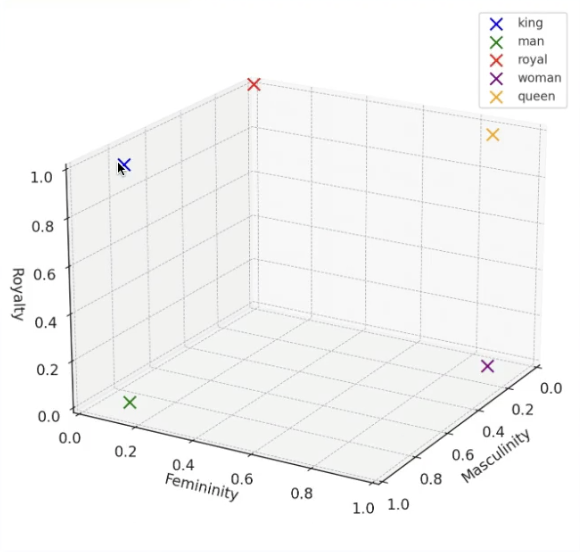

In [12]:
# 문장 embedding

from langchain.embeddings import OpenAIEmbeddings

embedder = OpenAIEmbeddings()

vector = embedder.embed_documents(["Hi,", "How", "are", "you longger sentences becuase"])

print(len(vector), len(vector[0]))

/Users/undefinedkosmos/ai/fullstack-gpt/env/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


4 1536


In [26]:
# 문서 embedding
# Vector Store : 벡터 공간에 벡터들을 넣는 공간,
# 캐싱하는 기능

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore

cache_dir = LocalFileStore("./.cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
  separator="\n",
  chunk_size=600,
  chunk_overlap=100,
)

loader = PyPDFLoader("./files/scale.pdf")
docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
  embeddings, cache_dir  
)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

# results = vectorstore.similarity_search("확장되지 않은 작업이라는 것이 무슨 의미야?")
# print(len(results))

In [27]:
# Document Chain, off-the-shelf chain
# Stuff : 사용자가 차은 docs 들로 prompt를 채우기(stuff) 하는데 사용한다는 의미
# Refine : 질문의 답변(document)을 참고해서 정제한 질문과 답변을 추출해내는 방법
# Map Reduce : document들을 입력받아서 개별적으로 요악을함, 그리고 각각의 요약본을 llm에게 전달함
# Map re-rank : 각 document를 통해 답변을 생성하고 답변에 대한 점수를 부여한 후 가장 높은 점수를 획득한 답변과 점수를 함께 반환함

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore
from langchain.chains import RetrievalQA

llm = ChatOpenAI()

cache_dir = LocalFileStore("./.cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
  separator="\n",
  chunk_size=600,
  chunk_overlap=100,
)

loader = PyPDFLoader("./files/scale.pdf")
docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
  embeddings, cache_dir  
)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

chain = RetrievalQA.from_chain_type(
  llm=llm,
  chain_type="stuff",
  retriever=vectorstore.as_retriever(),
)
chain.run("이 글의 주제가 뭐야?")

'글의 주제는 창업자들에게 두 번째 구성 요소가 비어 있는 아이디어가 나쁜 아이디어일 수 있다는 점을 상기시켜주는 것입니다. 또한, Sam Altman, Paul Buchheit, Patrick Collison, Kevin Hale, Steven Levy, Jessica Livingston, Geoff Ralston, 그리고 Garry Tan에게 초안을 읽어준 것에 대한 감사를 표현하고 있습니다.'

In [14]:
# stuff 직접 구현
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough

llm = ChatOpenAI(
  temperature=0.1
)

cache_dir = LocalFileStore("./.cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
  separator="\n",
  chunk_size=600,
  chunk_overlap=100,
)

loader = PyPDFLoader("./files/scale.pdf")
docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
  embeddings, cache_dir  
)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

retriever = vectorstore.as_retriever()

prompt = ChatPromptTemplate.from_messages([
  ("system", "You are helpful assistant. Answer questions using only the following context. If you don't know the naswer just say you don't know, don't make it up:\n\n{context}"),
  ("human", "{question}"),
])

chain = (
  {
    "context": retriever,
    "question": RunnablePassthrough()
  } 
  | prompt 
  | llm
)

chain.invoke("Describe Victory Mansions")

/Users/undefinedkosmos/ai/fullstack-gpt/env/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


AIMessage(content="I don't know.", response_metadata={'token_usage': <OpenAIObject at 0x165a004d0> JSON: {
  "prompt_tokens": 1204,
  "completion_tokens": 5,
  "total_tokens": 1209
}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-430820b7-33e3-4db5-a3a5-09e8c890e26f-0')

In [7]:
# MapReduce Chain 직접 구현
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda

llm = ChatOpenAI(
  temperature=0.1
)

cache_dir = LocalFileStore("./.cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
  separator="\n",
  chunk_size=600,
  chunk_overlap=100,
)

loader = PyPDFLoader("./files/scale.pdf")
docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
  embeddings, cache_dir  
)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

retriever = vectorstore.as_retriever()

map_doc_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            Use the following portion of a long document to see if any of the text is relevant to answer the question. Return any relevant text verbatim. If there is no relevant text, return : ''
            -------
            {context}
            """,
        ),
        ("human", "{question}"),
    ]
)

map_doc_chain = map_doc_prompt | llm


def map_docs(inputs):
    documents = inputs["documents"]
    question = inputs["question"]
    return "\n\n".join(
        map_doc_chain.invoke(
            {"context": doc.page_content, "question": question}
        ).content
        for doc in documents
    )


map_chain = {
    "documents": retriever,
    "question": RunnablePassthrough(),
} | RunnableLambda(map_docs)

final_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            Given the following extracted parts of a long document and a question, create a final answer. 
            If you don't know the answer, just say that you don't know. Don't try to make up an answer.
            ------
            {context}
            """,
        ),
        ("human", "{question}"),
    ]
)

chain = {"context": map_chain, "question": RunnablePassthrough()} | final_prompt | llm

chain.invoke("What is the topic of this article? ")

AIMessage(content='The topic of the article is about the vulnerability and challenges faced by startups in their early stages, highlighting that this vulnerability is not unique to Airbnb but common among most startups. It also mentions how this initial vulnerability is often misunderstood by inexperienced founders, investors, journalists, and forum participants.', response_metadata={'token_usage': <OpenAIObject at 0x12e728110> JSON: {
  "prompt_tokens": 242,
  "completion_tokens": 56,
  "total_tokens": 298
}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3f40958c-9233-48f0-9067-87284e656788-0')